In [2]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [54]:
topics = pd.read_excel('topics_fin.xlsx')
topics.head()

0  \
Alabama     ('Topic', 0, '->', (0, u'0.015*"job" + 0.008*"...   
Alaska      ('Topic', 0, '->', (0, u'0.014*"please" + 0.01...   
Arizona     ('Topic', 0, '->', (0, u'0.017*"love" + 0.011*...   
Arkansas    ('Topic', 0, '->', (0, u'0.018*"win" + 0.018*"...   
California  ('Topic', 0, '->', (0, u'0.013*"it" + 0.010*"p...   

                                                            1  \
Alabama     ('Topic', 1, '->', (1, u'0.017*"get" + 0.015*"...   
Alaska      ('Topic', 1, '->', (1, u'0.018*"good" + 0.014*...   
Arizona     ('Topic', 1, '->', (1, u'0.027*"trump" + 0.012...   
Arkansas    ('Topic', 1, '->', (1, u'0.014*"trump" + 0.009...   
California  ('Topic', 1, '->', (1, u'0.016*"trump" + 0.012...   

                                                            2  \
Alabama     ('Topic', 2, '->', (2, u'0.011*"america" + 0.0...   
Alaska      ('Topic', 2, '->', (2, u'0.019*"trump" + 0.011...   
Arizona     ('Topic', 2, '->', (2, u'0.012*"good" + 0.010*...   
Arkansas    ('Topic', 2, '->', (2, u'0.015*"like" + 0.011*...   
California  ('Topic', 2, '->', (2, u'0.016*"like" + 0.013*...   

                                                            3  \
Alabama     ('Topic', 3, '->', (3, u'0.017*"via" + 0.009*"...   
Alaska      ('Topic', 3, '->', (3, u'0.013*"one" + 0.009*"...   
Arizona     ('Topic', 3, '->', (3, u'0.013*"get" + 0.013*"...   
Arkansas    ('Topic', 3, '->', (3, u'0.021*"trump" + 0.017...   
California  ('Topic', 3, '->', (3, u'0.014*"" + 0.008*"tax...   

                                                            4  
Alabama     ('Topic', 4, '->', (4, u'0.013*"it" + 0.011*"c...  
Alaska      ('Topic', 4, '->', (4, u'0.013*"via" + 0.011*"...  
Arizona     ('Topic', 4, '->', (4, u'0.013*"dont" + 0.012*...  
Arkansas    ('Topic', 4, '->', (4, u'0.023*"" + 0.017*"tru...  
California  ('Topic', 4, '->', (4, u'0.011*"sarcasm" + 0.0...

In [40]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%, 50%)"

def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(240, 100%, 50%)"

0    ('Topic', 0, '->', (0, u'0.015*"job" + 0.008*"...
1    ('Topic', 1, '->', (1, u'0.017*"get" + 0.015*"...
2    ('Topic', 2, '->', (2, u'0.011*"america" + 0.0...
3    ('Topic', 3, '->', (3, u'0.017*"via" + 0.009*"...
4    ('Topic', 4, '->', (4, u'0.013*"it" + 0.011*"c...
Name: Alabama, dtype: object
{'great': 0.008, 'good': 0.008, 'love': 0.005, 'state': 0.008, 'it': 0.008, 'job': 0.015, 'say': 0.008}


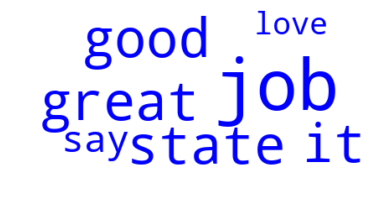

In [56]:
#for one topic
stateName = 'Alabama'
state = topics.loc[stateName]
print(state)
topicState = 0
splitted = state[topicState].encode('utf-8').split(',')
words = splitted[4].split(' + ')
worddict = {}
for word in words:
    amount = re.search('([0-9,\.]+)', word)
    topic = re.search('(?<=\")(.*?)(?=\")', word)
    worddict[topic.group()] = float(amount.group())
    
print(worddict)
if '' in worddict:
    worddict.pop('')
wordcloud = WordCloud(background_color="white").generate_from_frequencies(worddict)

plt.imshow(wordcloud.recolor(color_func=blue_color_func), interpolation='bilinear')
plt.axis("off")
plt.savefig('{}_{}.png'.format(stateName, topicState), dpi=300)
plt.figure()
plt.show()

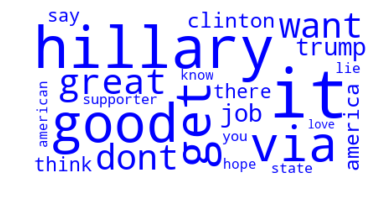

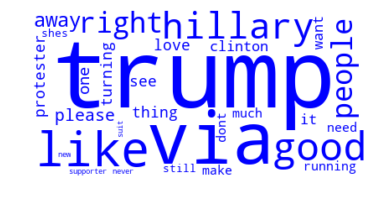

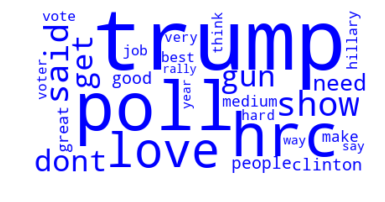

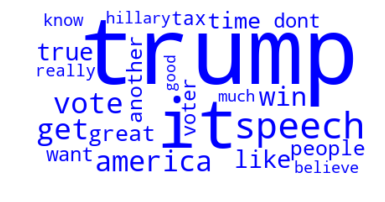

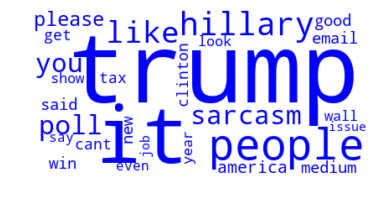

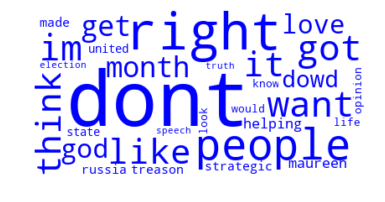

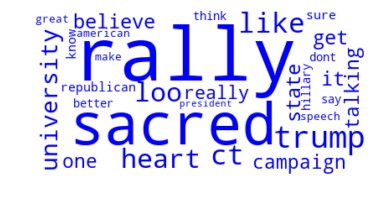

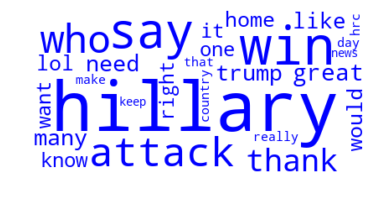

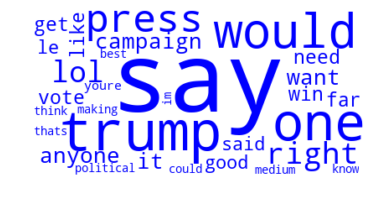

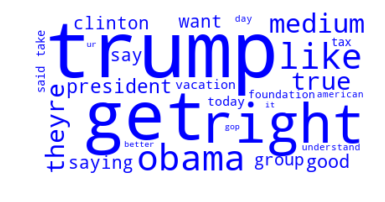

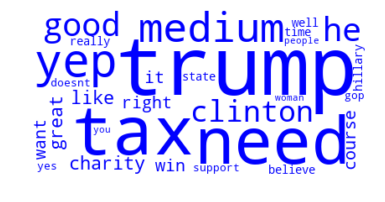

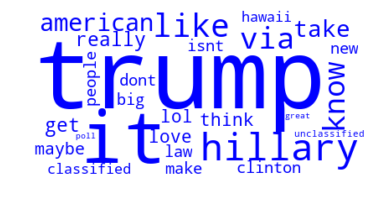

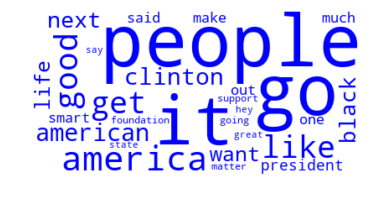

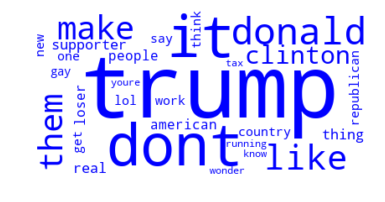

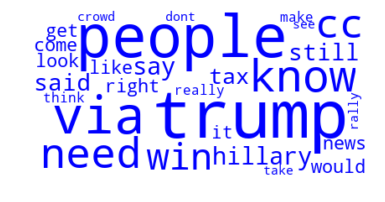

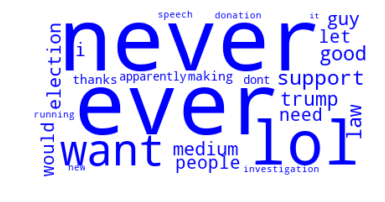

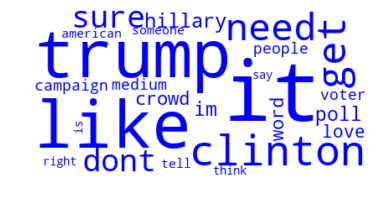

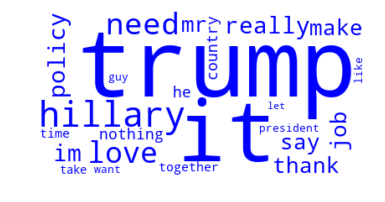

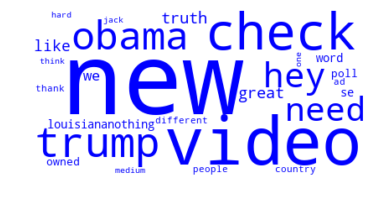

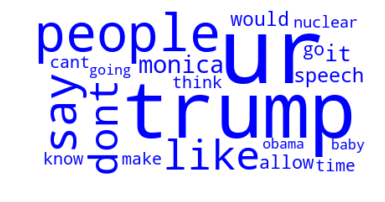

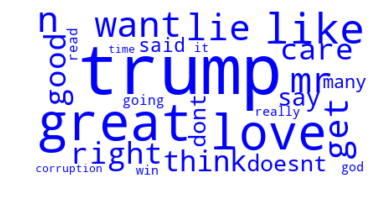

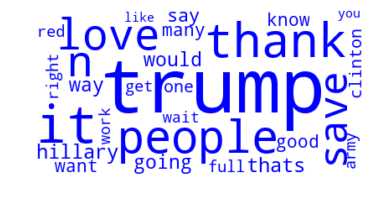

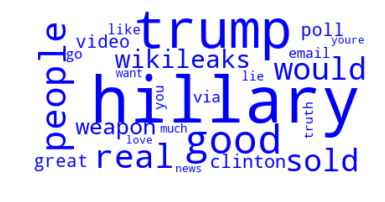

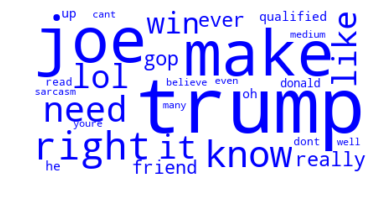

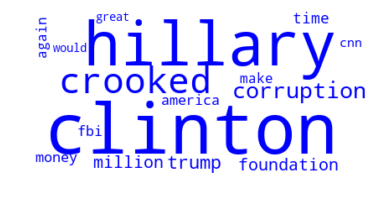

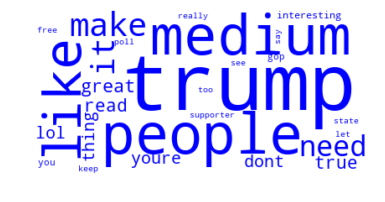

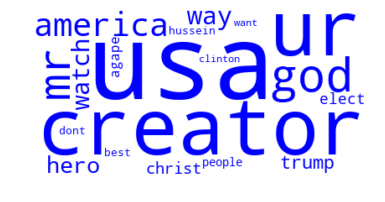

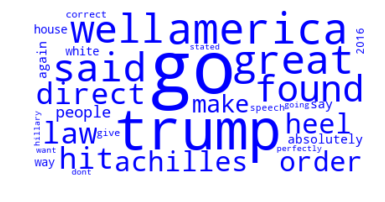

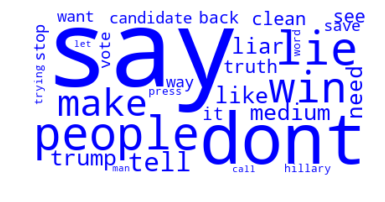

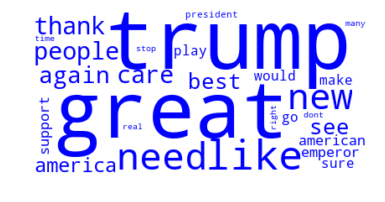

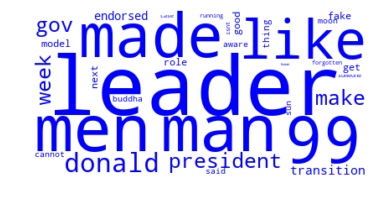

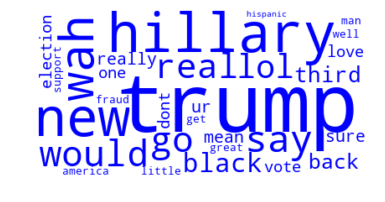

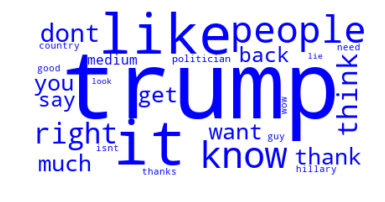

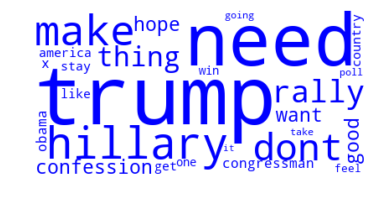

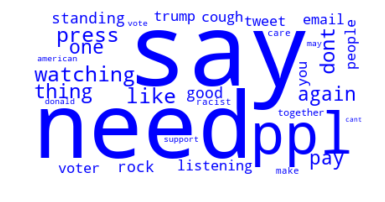

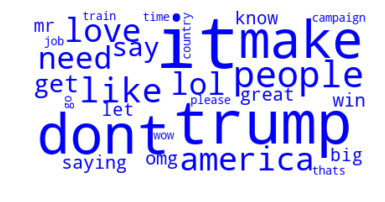

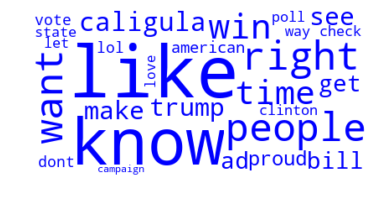

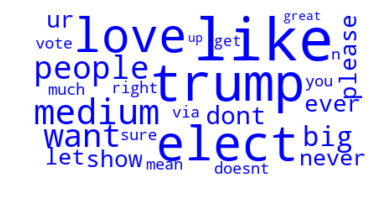

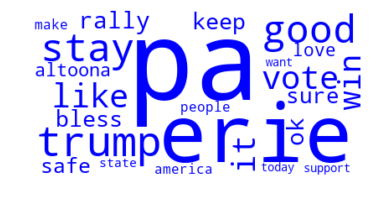

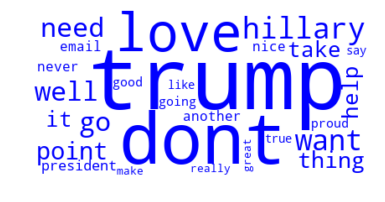

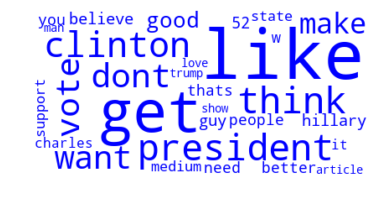

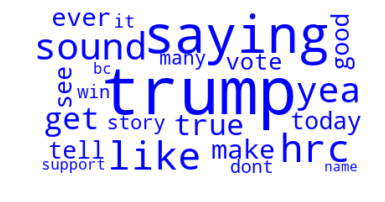

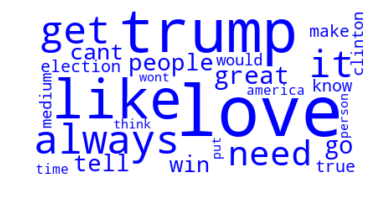

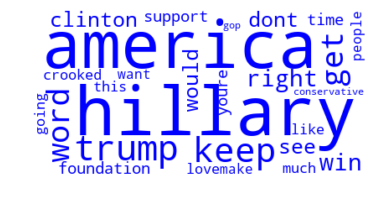

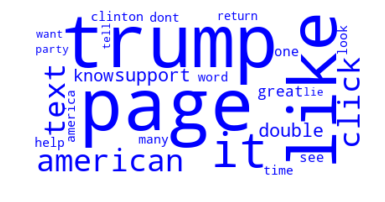

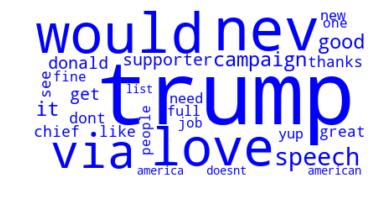

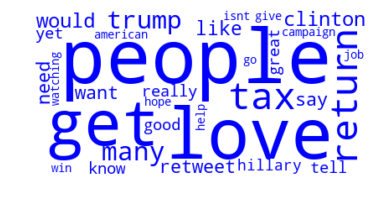

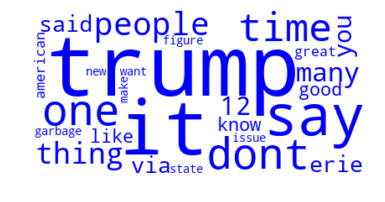

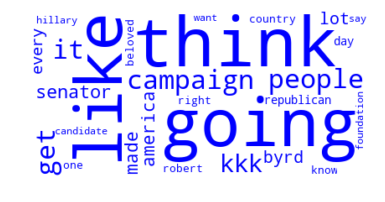

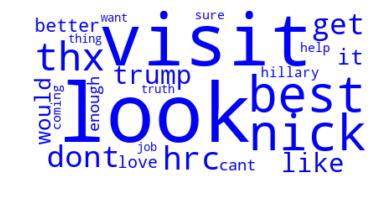

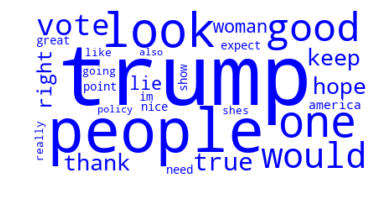

In [57]:
# Iter through dataset and create for every state a wordcloud in the directory states_wordclouds
for index, row in topics.iterrows():
    # Wordcloud for one State
    state = index
    stateTopics = topics.loc[state]
    stateDict = {}
    # loop through topics
    for topic in xrange(0,5):
        splitted_topic = stateTopics[topic].encode('utf-8').split(',')
        words = splitted_topic[4].split(' + ')
        # Loop through all the words in one topic
        for word in words:
            amount = re.search('([0-9,\.]+)', word)
            topic = re.search('(?<=\")(.*?)(?=\")', word)
            # Check if key already exists, if so add the existing value
            if topic.group() in stateDict:
                stateDict[topic.group()] = stateDict[topic.group()] + float(amount.group())
            else:
                stateDict[topic.group()] = float(amount.group())

    # Remove key's which are empty
    if '' in stateDict:
        stateDict.pop('')
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(stateDict)

    plt.imshow(wordcloud.recolor(color_func=blue_color_func), interpolation='bilinear')
    plt.axis("off")
    plt.savefig('states_wordclouds/{}.png'.format(state), dpi=300)
    plt.figure()
    plt.show()

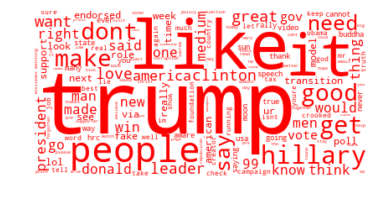

In [48]:
# Wordcloud for one whole dataset
fullDict = {}

# Iter through dataset to retrieve 
for index, row in topics.iterrows():
    state = index
    stateTopics = row
    # loop through topics
    for topic in xrange(0,5):
        splitted_topic = stateTopics[topic].encode('utf-8').split(',')
        words = splitted_topic[4].split(' + ')
        # Loop through all the words in one topic
        for word in words:
            amount = re.search('([0-9,\.]+)', word)
            topic = re.search('(?<=\")(.*?)(?=\")', word)
            # Check if key already exists, if so add the existing value
            if topic.group() in fullDict:
                fullDict[topic.group()] = fullDict[topic.group()] + float(amount.group())
            else:
                fullDict[topic.group()] = float(amount.group())

# Remove empty keys
if '' in fullDict:
    fullDict.pop('')            
wordcloud = WordCloud(background_color="white").generate_from_frequencies(fullDict)

plt.imshow(wordcloud.recolor(color_func=red_color_func), interpolation='bilinear')
plt.axis("off")
plt.savefig('states_wordclouds/United States.png', dpi=300)
plt.figure()
plt.show()